In [46]:
import zipfile
import numpy as np
import pandas as pd
import gzip
import shutil
#from Bio import SeqIO
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from matplotlib.pyplot import figure

In [4]:
#https://archive.openprot.org/p/download
OP_file="human-openprot-r1_6-refprots+altprots+isoforms-+uniprot2019_03_01.tsv"

In [3]:
#Unarchive OP_file
with zipfile.ZipFile(f'{OP_file}.zip', 'r') as zip_ref:
    zip_ref.extractall("./")

In [8]:
OP_df=pd.read_csv(OP_file,sep="\t",skiprows=[0])

C:\Users\Lera\AppData\Local\Temp\ipykernel_6584\4042716307.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  OP_df=pd.read_csv(OP_file,sep="\t",skiprows=[0])


In [11]:
OP_df_refprot_ms0=OP_df.loc[(OP_df["protein type"]=="RefProt"),]

In [12]:
OP_df_altprot_ms0=OP_df.loc[(OP_df["protein type"]=="AltProt"),] 

In [21]:
#BioMart query of Ensemble 95 (compatible with Openprot v1.6)
#https://jan2019.archive.ensembl.org/biomart/martview/dace2a612a1691831d9f86d3c6c0e59c
MART_file="./mart95_export.txt" 

In [22]:
with gzip.open(f'{MART_file}.gz', 'rb') as f_in:
    with open(MART_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [23]:
MART_df=pd.read_csv(MART_file,sep="\t")

In [25]:
psdg_ind_mart=[i for x,i in zip(list(MART_df["Gene type"]),list(MART_df.index)) if "pseudogene" in x]
MART_df_psdg=MART_df.iloc[psdg_ind_mart,:]

In [29]:
MART_psdg_trxlist=list(MART_df_psdg["Transcript stable ID"])

In [28]:
OP_df_altprot_ms0["id"]=pd.DataFrame(OP_df_altprot_ms0['transcript accession'].apply(lambda x: x.split(".")[0]))

C:\Users\Lera\AppData\Local\Temp\ipykernel_6584\1683176474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OP_df_altprot_ms0["id"]=pd.DataFrame(OP_df_altprot_ms0['transcript accession'].apply(lambda x: x.split(".")[0]))


In [30]:
OP_df_altprot_ms0_psdg=OP_df_altprot_ms0[OP_df_altprot_ms0['id'].isin(MART_psdg_trxlist)]

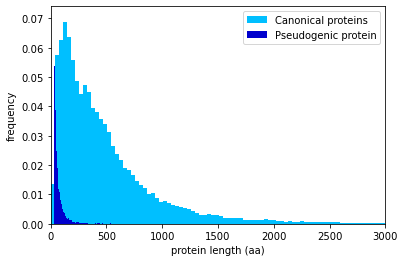

In [37]:
#frequency histogram. 
plt.hist(list(OP_df_refprot_ms0['protein length (a.a.)']),bins=1000,color="deepskyblue",weights=np.zeros_like(list(OP_df_refprot_ms0['protein length (a.a.)'])) + 1. / len(list(OP_df_refprot_ms0['protein length (a.a.)'])));
plt.hist(list(OP_df_altprot_ms0_psdg['protein length (a.a.)']),bins=1000,color="mediumblue",weights=np.zeros_like(list(OP_df_altprot_ms0_psdg['protein length (a.a.)'])) + 1. / len(list(OP_df_altprot_ms0_psdg['protein length (a.a.)'])));
plt.xlim(0,3000);
plt.ylabel("frequency");
plt.xlabel("protein length (aa)");
plt.legend(["Canonical proteins","Pseudogenic protein"]);
#plt.savefig("freq_protlen.svg");
plt.savefig("freq_protlen.png");

In [39]:
OP_df_refprot_ms0_len300=OP_df_refprot_ms0.loc[OP_df_refprot_ms0['protein length (a.a.)']<300,]

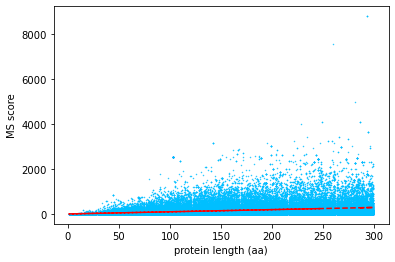

In [42]:
x=list(OP_df_refprot_ms0_len300['protein length (a.a.)'])
y=list(OP_df_refprot_ms0_len300['MS score'])
plt.scatter(x,y,s=0.2,color="deepskyblue")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");
plt.ylabel("MS score");
plt.xlabel("protein length (aa)");
#plt.savefig("ms_protlen.svg")
plt.savefig("ms_protlen.png")

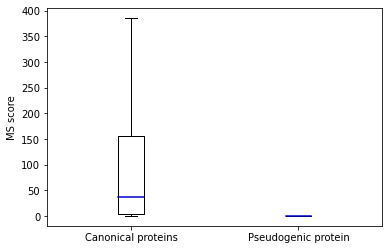

In [43]:
my_dict2 = {'Canonical proteins': list(OP_df_refprot_ms0_len300['MS score']), 'Pseudogenic protein': list(OP_df_altprot_ms0_psdg['MS score'])}
fig, ax = plt.subplots()
ax.boxplot(my_dict2.values(),showfliers=False,medianprops = dict(color = "mediumblue", linewidth = 1.5)) #outliers hidden
ax.set_xticklabels(my_dict2.keys());
plt.ylabel("MS score");
#plt.savefig("ms_refalt.svg")
plt.savefig("ms_refalt.png")

In [44]:
#save main objects
#OP_df.to_pickle("./OP16_df.pkl")
#OP_df_refprot_ms0.to_pickle("./OP16_df_refprot_ms0.pkl")
#OP_df_altprot_ms0.to_pickle("./OP16_df_altprot_ms0.pkl")
#MART_df.to_pickle("./MART95_df.pkl")
#MART_df_psdg.to_pickle("./MART95_df_psdg.pkl")
#OP_df_altprot_ms0_psdg.to_pickle("./OP16_df_altprot_ms0_psdg.pkl")
#OP_df_refprot_ms0_len300.to_pickle("./OP16_df_refprot_ms0_len300.pkl")

In [2]:
#open main objects
#OP_df=pd.read_pickle("./OP16_df.pkl")
#OP_df_refprot_ms0=pd.read_pickle("./OP16_df_refprot_ms0.pkl")
#OP_df_altprot_ms0=pd.read_pickle("./OP16_df_altprot_ms0.pkl")
#MART_df=pd.read_pickle("./MART95_df.pkl")
#MART_df_psdg=pd.read_pickle("./MART_df_psdg.pkl")
#OP_df_altprot_ms0_psdg=pd.read_pickle("./OP16_df_altprot_ms0_psdg.pkl")
#OP_df_refprot_ms0_len300=pd.read_pickle("./OP16_df_refprot_ms0_len300.pkl")